<h2>DATA 620 - Web Analytics - Final Project</h2>

<h3>Team : Mohamed Thasleem, Kalikul Zaman and Jeyaraman Ramalingam</h3>

<h3>Introduction</h3>

Build an sentiment analysis from popular twitter account and analyze possible network analysis with multiple twitter accounts

<h3>Analysis Overview</h3>
<ol>
  <li>Loading the dataset: Load the data and import the libraries.</li>
  <li>Data Preprocessing (Analysing missing data and removing redendant columns)</li>
  <li>Visualising and counting sentiments of tweets for each airline</li>
  <li>Wordcloud plots for positive and negative tweets to visualise most frequent words for each.</li>
  <li>Analysing the reasons for negative tweets for each airline.</li>
  <li>Predicting the tweet sentiments with tweet text data with multiple classifer models</li>
  <li>Calculating accuracies of the models</li>
  <li>Buliding Network Graph</li>
  <li>Conclusion</li>
</ol>

<h3>Importing the libraries and loading the data</h3>

In [143]:
#Import Libraries
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [144]:
#Import Data
Tweet= pd.read_csv("https://raw.githubusercontent.com/mohamedthasleem/DATA620/master/Tweets.csv")

<h3>Data Preprocessing</h3>

Identifying the null values or NA and eliminating from the dataset, getting the count of type of tweets

In [145]:
print("Percentage null or na values in df")
((Tweet.isnull() | Tweet.isna()).sum() * 100 / Tweet.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [146]:
#Removing the following column because of more than 90% having null data
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [147]:
#Display Tweet Sentiment
Mood_count=Tweet['airline_sentiment'].value_counts()
print(Mood_count)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


<h3>Sentiment of Each Airline</h3>
<ol>
  <li>Calculate the total number of tweets for each airline.</li>
  <li>Barplots for each airline with respect to sentiments of tweets</li>
  <li>Visualising airline relationship</li>
</ol>    

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


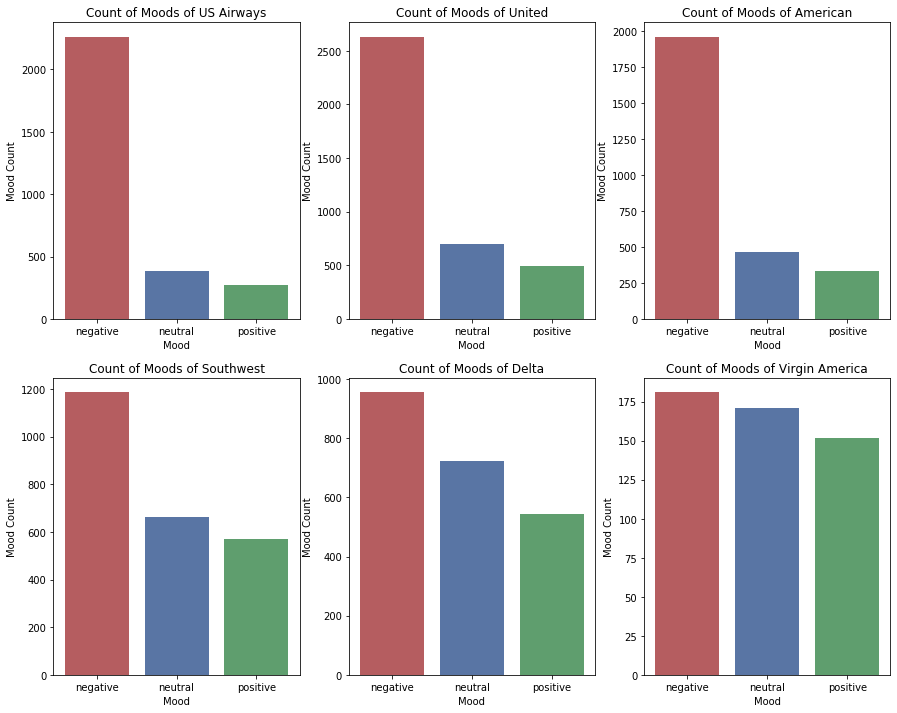

In [148]:
df = Tweet
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(15, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['#b55d60', '#5975a4', '#5f9e6e'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

<h3>Reasons for negative sentiment</h3>

Explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

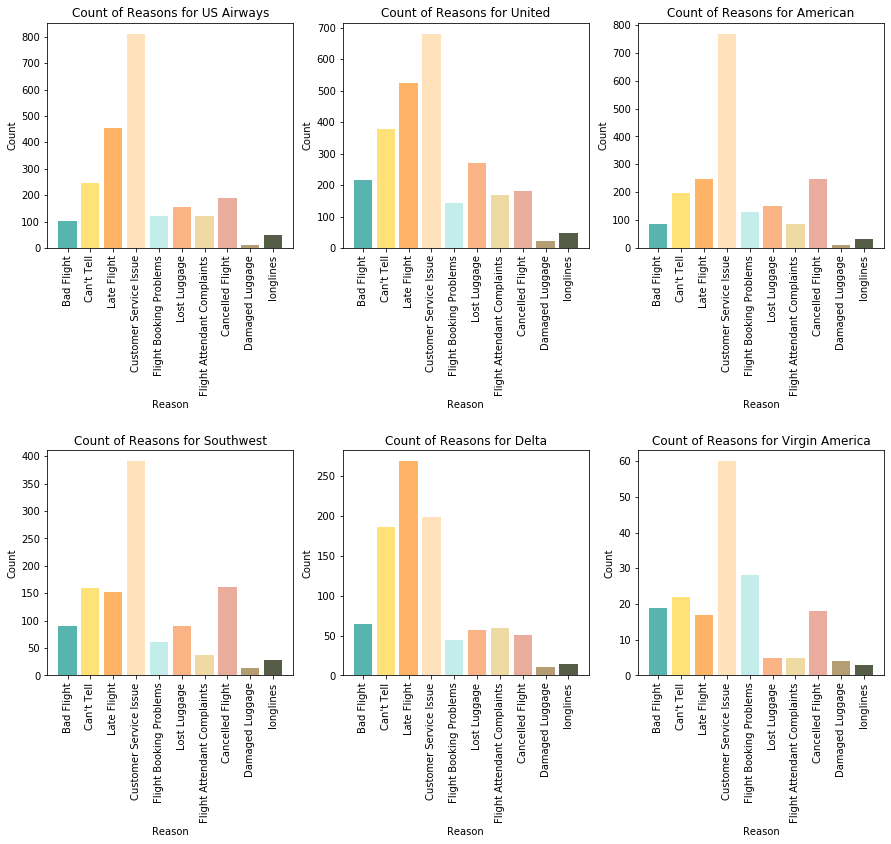

In [149]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['#58b4ae','#ffe277','#ffb367','#ffe2bc','#c3edea','#f9b384','#f0daa4','#eaac9d','#b49c73','#565d47'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plt.figure(2,figsize=(15, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

<h3>Negative Tweets</h3>

Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data

In [150]:
from wordcloud import WordCloud,STOPWORDS

In [151]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith('wa')
                                and not word.startswith('now')
                                and word != 'RT'
                            ])

In [152]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',contour_width=1, contour_color='steelblue',
                      width=4000,
                      height=2500
                     ).generate(cleaned_word)

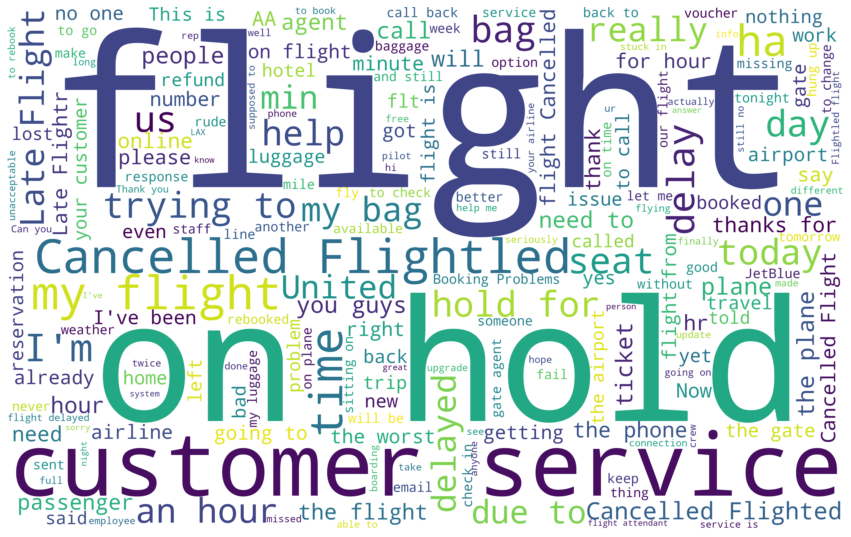

In [153]:
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Positive Tweets</h3>

In [154]:
df=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and word != 'RT'
                            ])

In [155]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',contour_width=1, contour_color='steelblue',
                      width=4000,
                      height=2500
                     ).generate(cleaned_word)

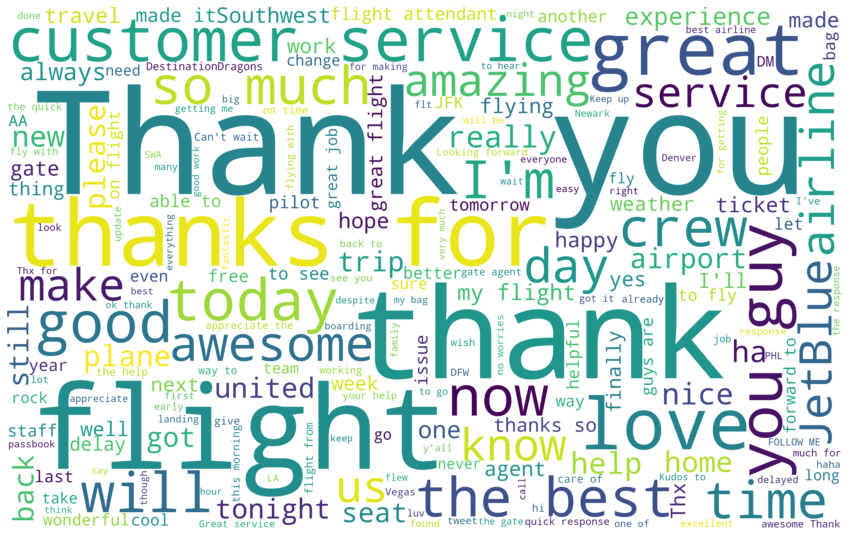

In [156]:
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Data Exploration - Model Classifier</h3>

The next step will be preprocess the data in order to make the learning process more smooth, inorder to get the better results on classifer models

<h3>Preprocessing the tweet text data</h3>

Clean the tweet text data and apply classification algorithms on it

In [157]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [158]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [159]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [160]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [161]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

<h3>Prediciting sentiments from tweet text data</h3>

Applying the following models

<ol>
    <li>LogisticRegression</li>
<li>KNeighborsClassifier</li>
<li>SVC</li>
<li>DecisionTreeClassifier</li>
<li>RandomForestClassifier</li>
<li>AdaBoostClassifier</li>
<li>GaussianNB</li>
    </ol>

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [164]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True,gamma='auto'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [165]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5891393442622951
Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7581967213114754
Accuracy of RandomForestClassifieris 0.8135245901639344
Accuracy of AdaBoostClassifieris 0.7855191256830601
Accuracy of GaussianNBis 0.5724043715846995


<h3>Compare the model performances</h3>

Text(0.5, 1.0, 'Accuracies of Models')

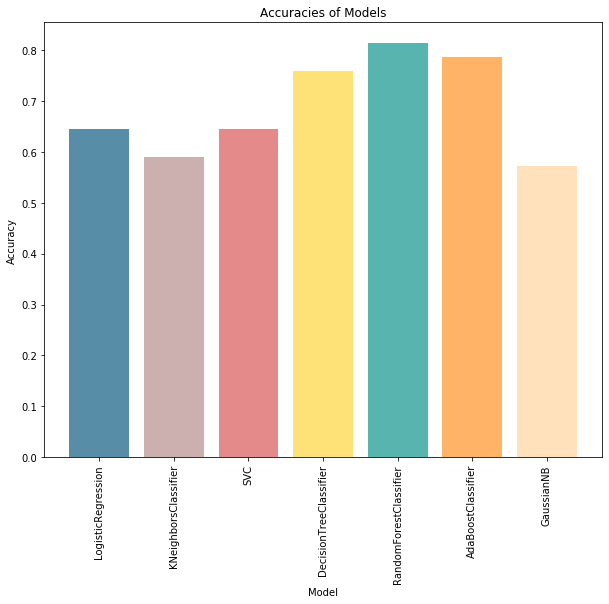

In [166]:
Index = [1,2,3,4,5,6,7]
plt.figure(5,figsize=(10, 8))
plt.bar(Index,Accuracy,color=['#588da8', '#ccafaf', '#e58a8a','#ffe277', '#58b4ae', '#ffb367', '#ffe2bc'])
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [167]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier()]

<b>Random Forest Classifier gives us the best accuracy score, precision scores according to the classification report.</b>

<h3>Confusion Matrix</h3>

In [168]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cf_matrix=confusion_matrix(pred , test['airline_sentiment'])
    #sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

Accuracy of DecisionTreeClassifier is 0.6799863387978142
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79      1839
     neutral       0.46      0.40      0.43       655
    positive       0.56      0.59      0.58       434

    accuracy                           0.68      2928
   macro avg       0.60      0.60      0.60      2928
weighted avg       0.67      0.68      0.68      2928

Accuracy of RandomForestClassifier is 0.7701502732240437
              precision    recall  f1-score   support

    negative       0.90      0.82      0.86      2082
     neutral       0.47      0.59      0.52       463
    positive       0.60      0.72      0.66       383

    accuracy                           0.77      2928
   macro avg       0.66      0.71      0.68      2928
weighted avg       0.80      0.77      0.78      2928

Accuracy of AdaBoostClassifier is 0.733948087431694
              precision    recall  f1-score   support

    negative     